In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress FutureWarnings (optional)
warnings.filterwarnings("ignore", category=FutureWarning)

In [67]:
# Load datasets

co2_emissions_data = pd.read_excel(r'C:\Users\ROSEMARY\OneDrive\Desktop\MacroEdTech Internship\Task 6_earth data analysis\CO2_emissions.xlsx')
co2_emissions_continents = pd.read_excel(r'C:\Users\ROSEMARY\OneDrive\Desktop\MacroEdTech Internship\Task 6_earth data analysis\CO2_emissions.xlsx', sheet_name='continents')
precipitation_data = pd.read_excel(r'C:\Users\ROSEMARY\OneDrive\Desktop\MacroEdTech Internship\Task 6_earth data analysis\precipitation.xlsx')
energy_data = pd.read_excel(r'C:\Users\ROSEMARY\OneDrive\Desktop\MacroEdTech Internship\Task 6_earth data analysis\World_Energy_By_Country_And_Region_1965_to_2023.xlsx')

In [27]:
# Handle missing data
def handle_missing_data(df):
    print("Missing values before handling:")
    print(df.isnull().sum())
    df.fillna(method='ffill', inplace=True)
    print("Missing values after handling:")
    print(df.isnull().sum())
    return df

temperature_data = handle_missing_data(temperature_data)

# Check for infinite values
print("Checking for infinite values:")
print((temperature_data == float('inf')).sum())
print((temperature_data == -float('inf')).sum())

Missing values before handling:
Year                                  0
Month                            136500
AverageTemperature                11002
AverageTemperatureUncertainty     11002
City                                  0
Country                               0
Latitude                              0
Longitude                             0
dtype: int64
Missing values after handling:
Year                             0
Month                            0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64
Checking for infinite values:
Year                             0
Month                            0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
d

In [28]:
# Convert infinite values to NaN
temperature_data.replace([float('inf'), -float('inf')], pd.NA, inplace=True)

# Drop rows with NaN values in 'Year' or 'AverageTemperature'
temperature_data.dropna(subset=['Year', 'AverageTemperature'], inplace=True)

# Ensure numeric types
temperature_data['Year'] = pd.to_numeric(temperature_data['Year'], errors='coerce')
temperature_data['AverageTemperature'] = pd.to_numeric(temperature_data['AverageTemperature'], errors='coerce')

# Drop rows again if conversion introduces NaNs
temperature_data.dropna(subset=['Year', 'AverageTemperature'], inplace=True)

# World Carbon dioxide emissions analysis

Missing values before handling:
Country                              0
Code                               678
Year                                 0
Annual Carbon dioxide emissions      0
dtype: int64
Missing values after handling:
Country                            0
Code                               0
Year                               0
Annual Carbon dioxide emissions    0
dtype: int64


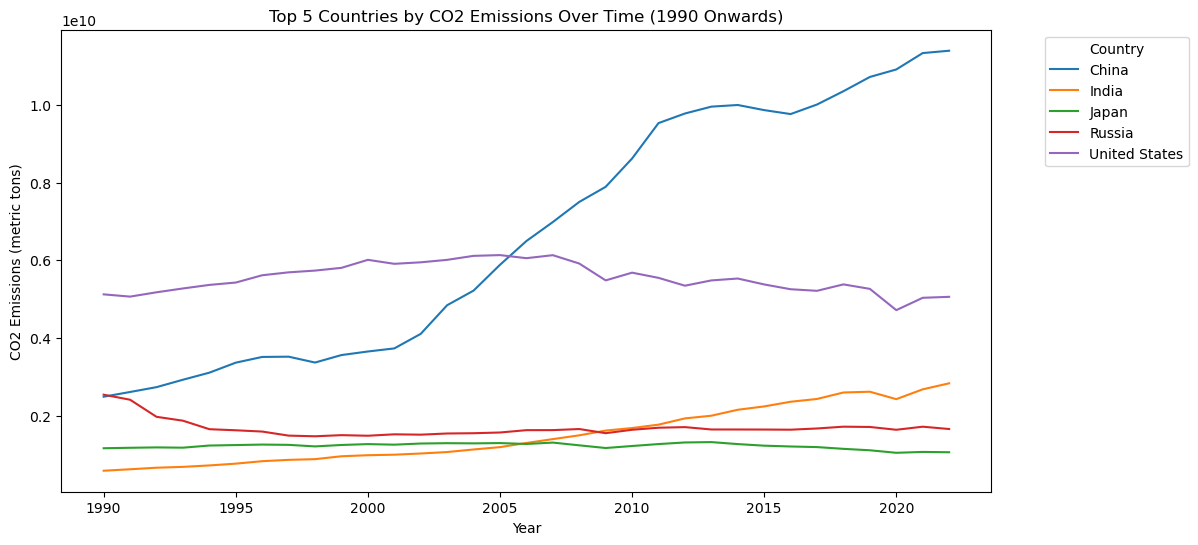

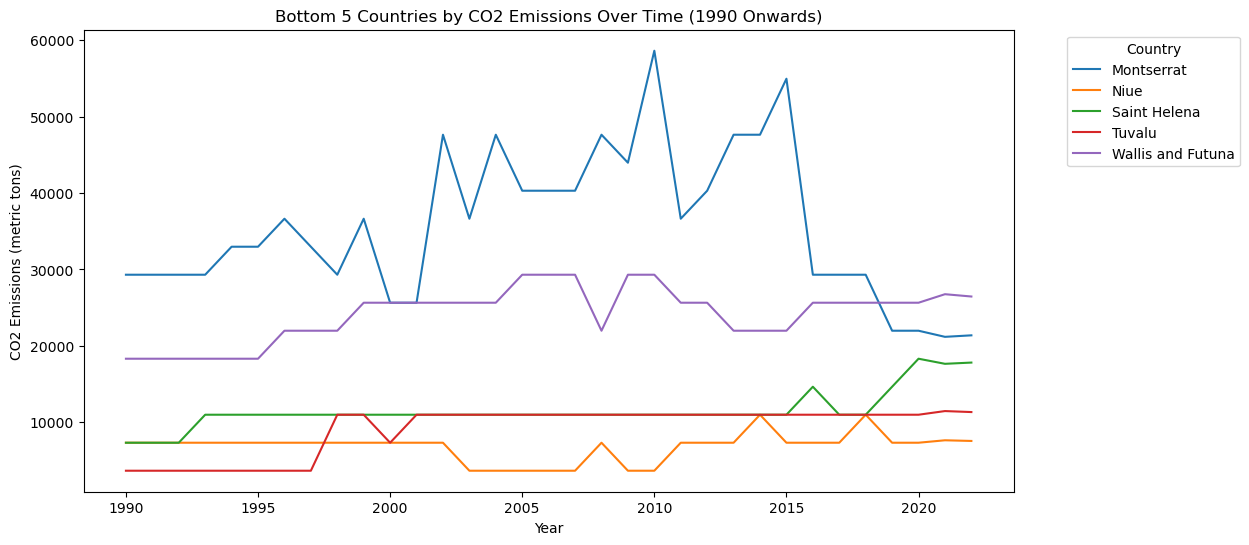

In [29]:
# Handle missing data
co2_emissions_data = handle_missing_data(co2_emissions_data)

# Filter data to include only years from 1990 onwards
co2_emissions_data = co2_emissions_data[co2_emissions_data['Year'] >= 1990]

# Calculate total CO2 emissions by country from 1990 onwards
total_emissions_by_country = co2_emissions_data.groupby('Country')['Annual Carbon dioxide emissions'].sum().sort_values()

# Get top 5 and bottom 5 countries
top_5_countries = total_emissions_by_country.tail(5).index
bottom_5_countries = total_emissions_by_country.head(5).index

# Filter the dataset for top 5 countries
top_5_data = co2_emissions_data[co2_emissions_data['Country'].isin(top_5_countries)]

# Filter the dataset for bottom 5 countries
bottom_5_data = co2_emissions_data[co2_emissions_data['Country'].isin(bottom_5_countries)]

# Top 5 CO2 Emissions Over Time from 1990
plt.figure(figsize=(12, 6))
sns.lineplot(data=top_5_data, x='Year', y='Annual Carbon dioxide emissions', hue='Country', estimator='mean')
plt.title('Top 5 Countries by CO2 Emissions Over Time (1990 Onwards)')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (metric tons)')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Bottom 5 CO2 Emissions Over Time from 1990
plt.figure(figsize=(12, 6))
sns.lineplot(data=bottom_5_data, x='Year', y='Annual Carbon dioxide emissions', hue='Country', estimator='mean')
plt.title('Bottom 5 Countries by CO2 Emissions Over Time (1990 Onwards)')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (metric tons)')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

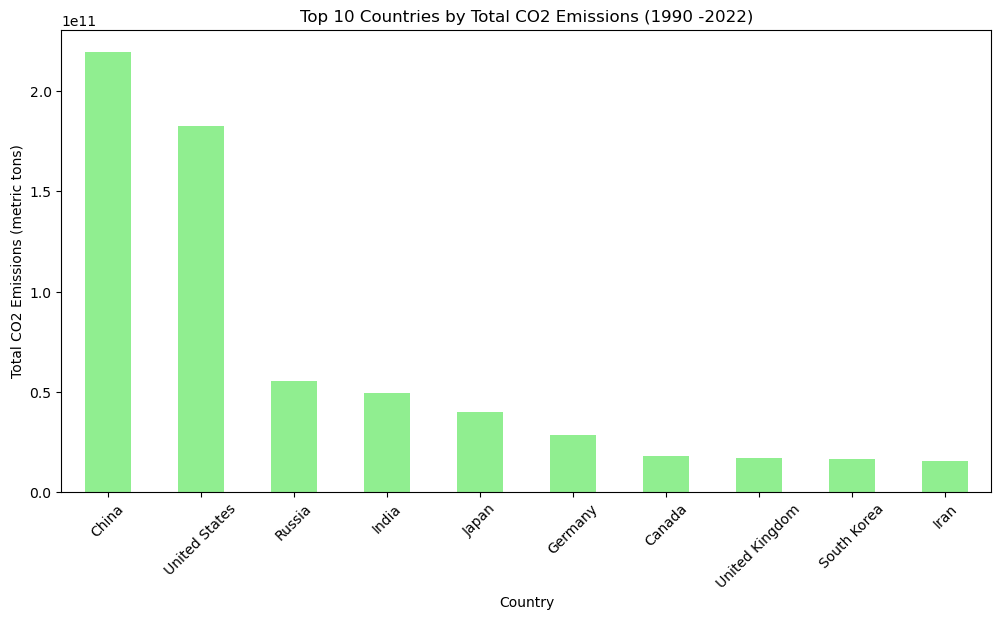

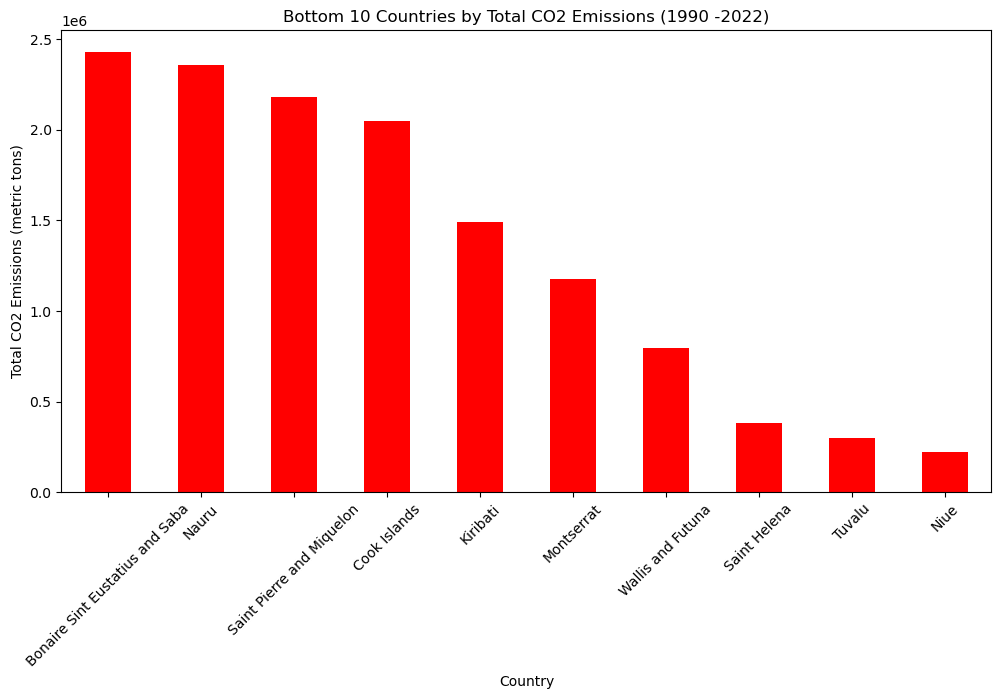

In [43]:
# Filter data to include only years from 1990 onwards
co2_emissions_data = co2_emissions_data[co2_emissions_data['Year'] >= 1990]

# Calculate total CO2 emissions by country from 1990 onwards
total_co2_by_country = co2_emissions_data.groupby('Country')['Annual Carbon dioxide emissions'].sum().sort_values(ascending=False)

# Get the top 10 countries and bottom 10
top_10_countries = total_co2_by_country.head(10)
bottom_10_countries = total_co2_by_country.tail(10)

# Bar Chart for Total CO2 Emissions by Top 10 Countries
plt.figure(figsize=(12, 6))
top_10_countries.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Countries by Total CO2 Emissions (1990 -2022)')
plt.xlabel('Country')
plt.ylabel('Total CO2 Emissions (metric tons)')
plt.xticks(rotation=45)
plt.show()

# Bar Chart for Total CO2 Emissions by Top 10 Countries
plt.figure(figsize=(12, 6))
bottom_10_countries.plot(kind='bar', color='red')
plt.title('Bottom 10 Countries by Total CO2 Emissions (1990 -2022)')
plt.xlabel('Country')
plt.ylabel('Total CO2 Emissions (metric tons)')
plt.xticks(rotation=45)
plt.show()

In [39]:
# Total CO2 Emissions by Continent
total_co2_by_continent = co2_emissions_continents.groupby('Country')['Annual Carbon dioxide emissions'].sum()



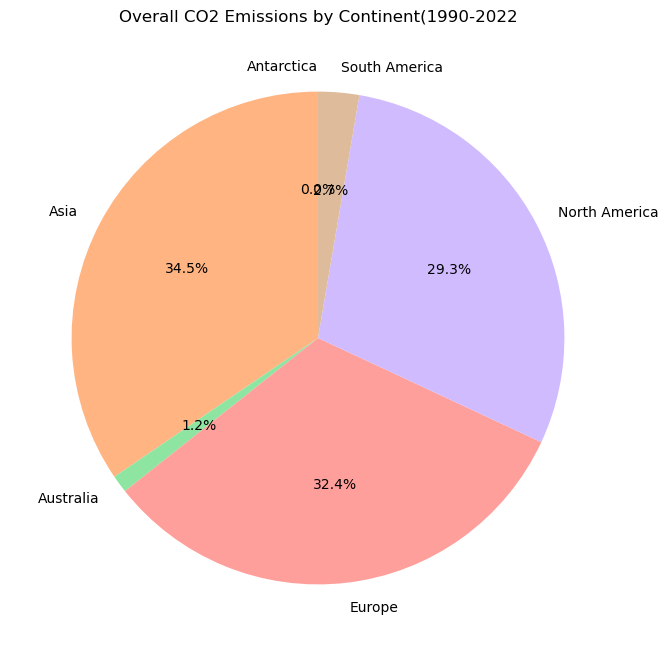

In [41]:
# Pie Chart for CO2 Emissions by Continent
plt.figure(figsize=(8, 8))
total_co2_by_continent.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Overall CO2 Emissions by Continent(1990-2022')
plt.ylabel('')  # Hide the y-label
plt.show()

# World energy consumption analysis

In [52]:
# Convert year columns to numeric
year_columns = energy_data.columns[1:]  # Exclude 'Country' column
energy_data[year_columns] = energy_data[year_columns].apply(pd.to_numeric, errors='coerce')

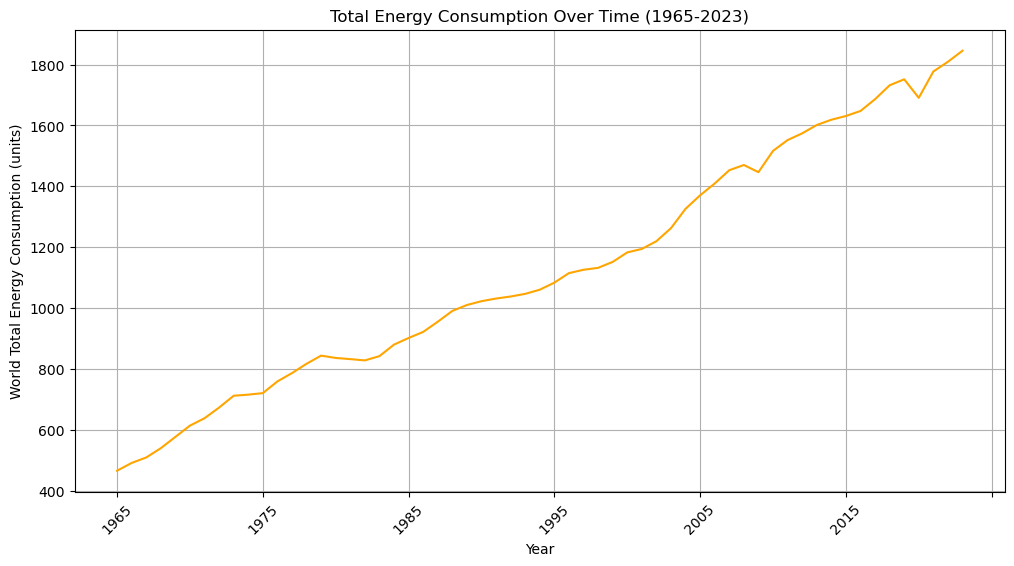

In [53]:
# Calculate total energy consumption for all countries over the years
total_energy_by_year = energy_data.loc[:, year_columns].sum()

# Plotting total energy consumption over time
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
total_energy_by_year.plot(kind='line', color='orange')
plt.title('Total Energy Consumption Over Time (1965-2023)')
plt.xlabel('Year')
plt.ylabel('World Total Energy Consumption (units)')
plt.xticks(rotation=45)
plt.grid()
plt.show()

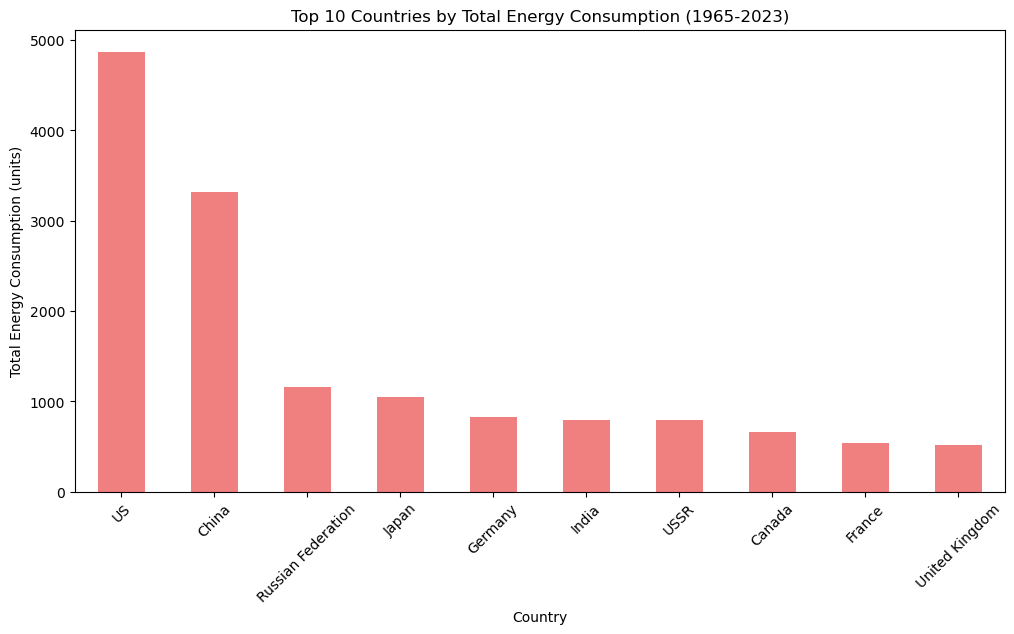

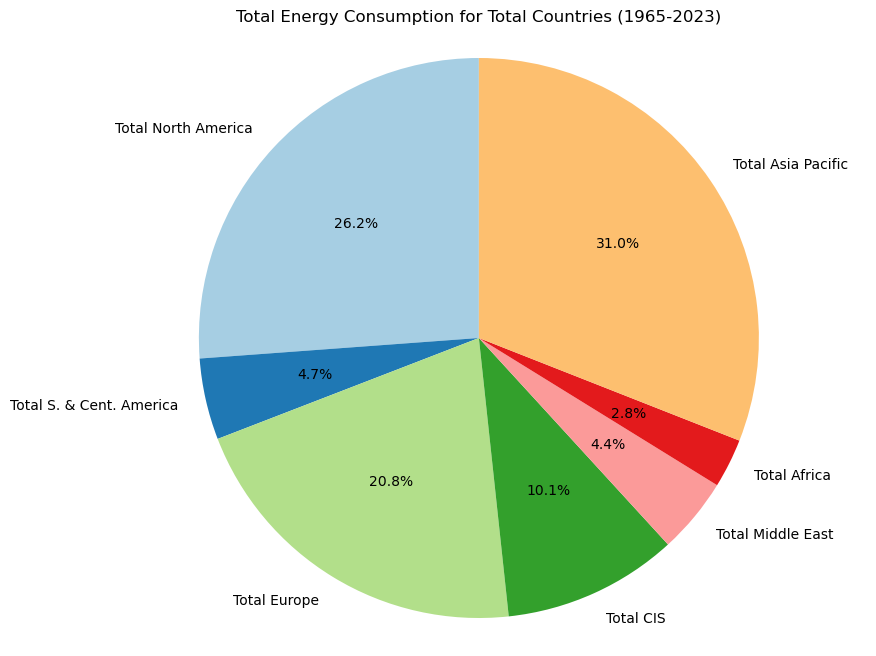

In [58]:
# Calculate total energy consumption by country, excluding those starting with "Total"
filtered_data = energy_data[~energy_data['Country'].str.startswith('Total')]
total_energy_by_country = filtered_data.set_index('Country').sum(axis=1).sort_values(ascending=False)

# Get top 10 countries excluding "Total"
top_10_energy_countries = total_energy_by_country.head(10)

# Bar Chart for Top 10 Energy Consumption by Country (excluding "Total")
plt.figure(figsize=(12, 6))
top_10_energy_countries.plot(kind='bar', color='lightcoral')
plt.title('Top 10 Countries by Total Energy Consumption (1965-2023)')
plt.xlabel('Country')
plt.ylabel('Total Energy Consumption (units)')
plt.xticks(rotation=45)
plt.show()

total_countries_data = energy_data[energy_data['Country'].str.startswith('Total') & ~energy_data['Country'].str.contains('World')]
total_energy_by_total_countries = total_countries_data.set_index('Country').sum(axis=1)

# Pie Chart for Total Countries
plt.figure(figsize=(10, 8))
total_energy_by_total_countries.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Total Energy Consumption for Total Countries (1965-2023)')
plt.ylabel('')  # Hide the y-label for a cleaner look
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

# World Precipitation analysis

In [92]:
import pandas as pd

# Load the precipitation data without filtering NaN values
precipitation_data = pd.read_excel(
    r'C:\Users\ROSEMARY\OneDrive\Desktop\MacroEdTech Internship\Task 6_earth data analysis\precipitation.xlsx',
    header=0  # Load without a header to inspect the raw data
)

# Display the first few rows to check the raw structure
print(precipitation_data.head(5))  # Adjust the number of rows displayed as needed

                  Country Name Country Code  \
0                        Aruba          ABW   
1  Africa Eastern and Southern          AFE   
2                  Afghanistan          AFG   
3   Africa Western and Central          AFW   
4                       Angola          AGO   

                                 Indicator Name  Indicator Code    1961  \
0  Average precipitation in depth (mm per year)  AG.LND.PRCP.MM     NaN   
1  Average precipitation in depth (mm per year)  AG.LND.PRCP.MM     NaN   
2  Average precipitation in depth (mm per year)  AG.LND.PRCP.MM   327.0   
3  Average precipitation in depth (mm per year)  AG.LND.PRCP.MM     NaN   
4  Average precipitation in depth (mm per year)  AG.LND.PRCP.MM  1010.0   

     1962    1963    1964    1965    1966  ...    2011    2012    2013  \
0     NaN     NaN     NaN     NaN     NaN  ...     NaN     NaN     NaN   
1     NaN     NaN     NaN     NaN     NaN  ...     NaN     NaN     NaN   
2   327.0   327.0   327.0   327.0   327.0  .

In [93]:
print(precipitation_data.dtypes)

# Drop rows with missing values
precipitation_data.dropna(inplace=True)

# Confirm that rows with missing values have been dropped
print(precipitation_data.isnull().sum())

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1961              float64
                   ...   
2016              float64
2017              float64
2018              float64
2019              float64
2020              float64
Length: 64, dtype: object
Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1961              0
                 ..
2016              0
2017              0
2018              0
2019              0
2020              0
Length: 64, dtype: int64


In [94]:
# Display the columns of the DataFrame to verify year columns
print("Columns in DataFrame:", precipitation_data.columns.tolist())

Columns in DataFrame: ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


In [113]:
# Define year columns
year_columns = [year for year in range(1961, 2021)]

# Replace NaN values with 0 to avoid issues in the sum
precipitation_data.fillna(0, inplace=True)

# Calculate total precipitation
precipitation_data['Total Precipitation'] = precipitation_data.loc[:, year_columns].sum(axis=1)

# Sort countries by total precipitation
print("Top 5 countries with highest overall precipation (1961-2020)")
sorted_precipitation = precipitation_data[['Country Name', 'Total Precipitation']].sort_values(by='Total Precipitation', ascending=False)

print(sorted_precipitation.head())  # Display top countries by total precipitation

# Assuming you have already calculated the 'Total Precipitation' column
# Sort countries by total precipitation in ascending order to find the bottom 5
bottom_precipitation = precipitation_data[['Country Name', 'Total Precipitation']].sort_values(by='Total Precipitation')
print("")
# Display the bottom 5 countries by total precipitation
print("Bottom 5 countries by total precipitation:")
print(bottom_precipitation.head(5))

Top 5 countries with highest overall precipation (1961-2020)
              Country Name  Total Precipitation
219  Sao Tome and Principe             192000.0
189       Papua New Guinea             188520.0
209        Solomon Islands             181680.0
185                 Panama             175680.0
48              Costa Rica             175560.0

Bottom 5 countries by total precipitation:
             Country Name  Total Precipitation
67       Egypt, Arab Rep.               1086.0
132                 Libya               3360.0
205          Saudi Arabia               3540.0
200                 Qatar               4440.0
8    United Arab Emirates               4680.0


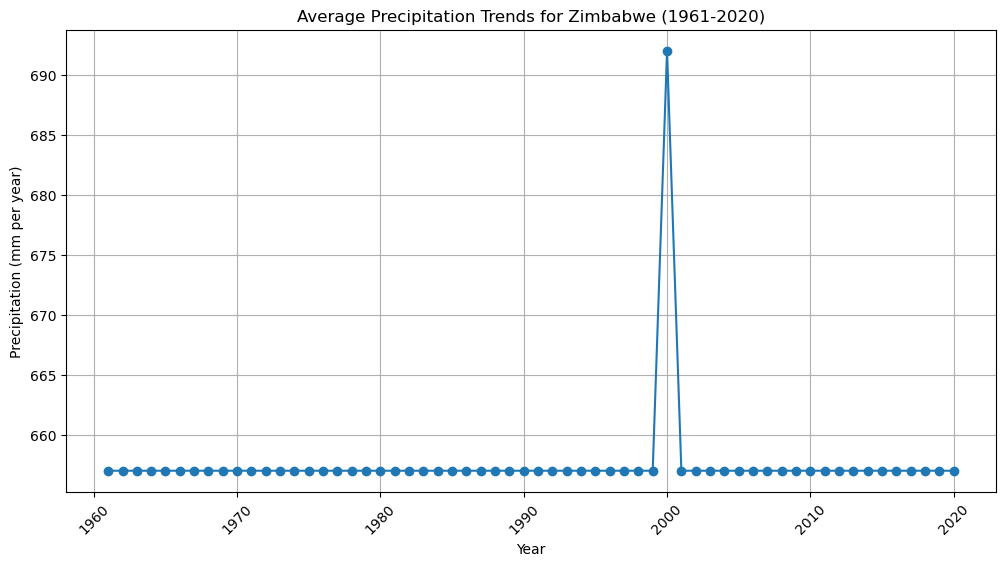

In [108]:
# Example: Plotting precipitation for Afghanistan
country_name = 'Zimbabwe'
country_data = precipitation_data.loc[precipitation_data['Country Name'] == country_name, year_columns].T

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(country_data.index, country_data.values, marker='o')
plt.title(f'Average Precipitation Trends for {country_name} (1961-2020)')
plt.xlabel('Year')
plt.ylabel('Precipitation (mm per year)')
plt.grid()
plt.xticks(rotation=45)
plt.show()

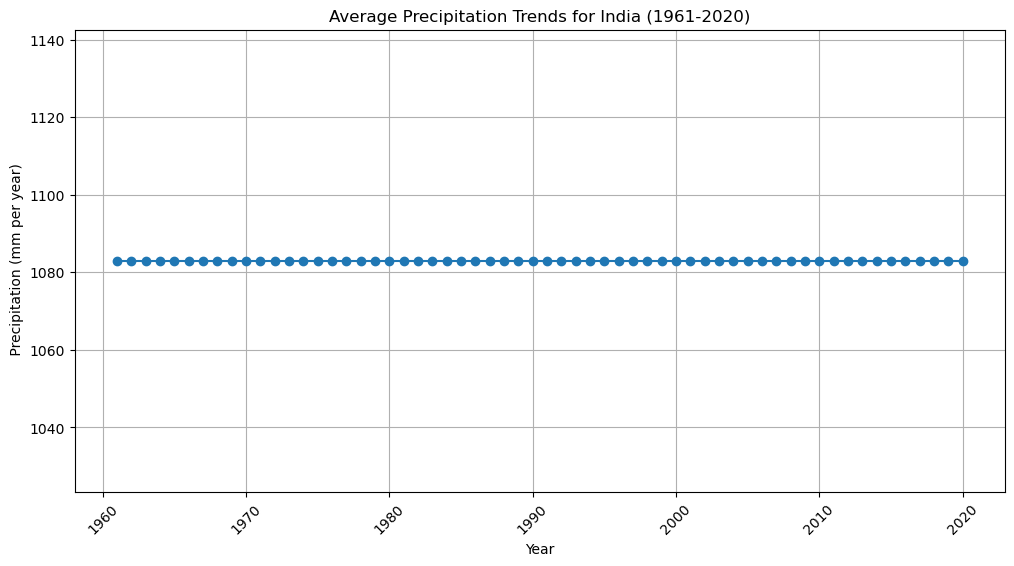

In [107]:
# Example: Plotting precipitation for Afghanistan
country_name = 'India'
country_data = precipitation_data.loc[precipitation_data['Country Name'] == country_name, year_columns].T

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(country_data.index, country_data.values, marker='o')
plt.title(f'Average Precipitation Trends for {country_name} (1961-2020)')
plt.xlabel('Year')
plt.ylabel(' Precipitation (mm per year)')
plt.grid()
plt.xticks(rotation=45)
plt.show()

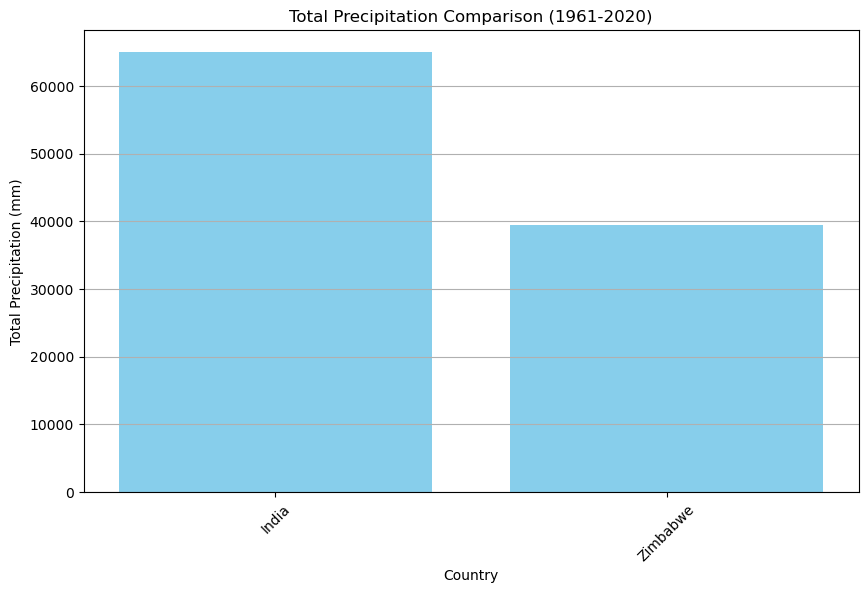

In [109]:
# Select countries to compare
countries_to_compare = ['Zimbabwe', 'India']
comparison_data = precipitation_data[precipitation_data['Country Name'].isin(countries_to_compare)]

# Bar plot for comparison
plt.figure(figsize=(10, 6))
plt.bar(comparison_data['Country Name'], comparison_data['Total Precipitation'], color='skyblue')
plt.title('Total Precipitation Comparison (1961-2020)')
plt.ylabel('Total Precipitation (mm)')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

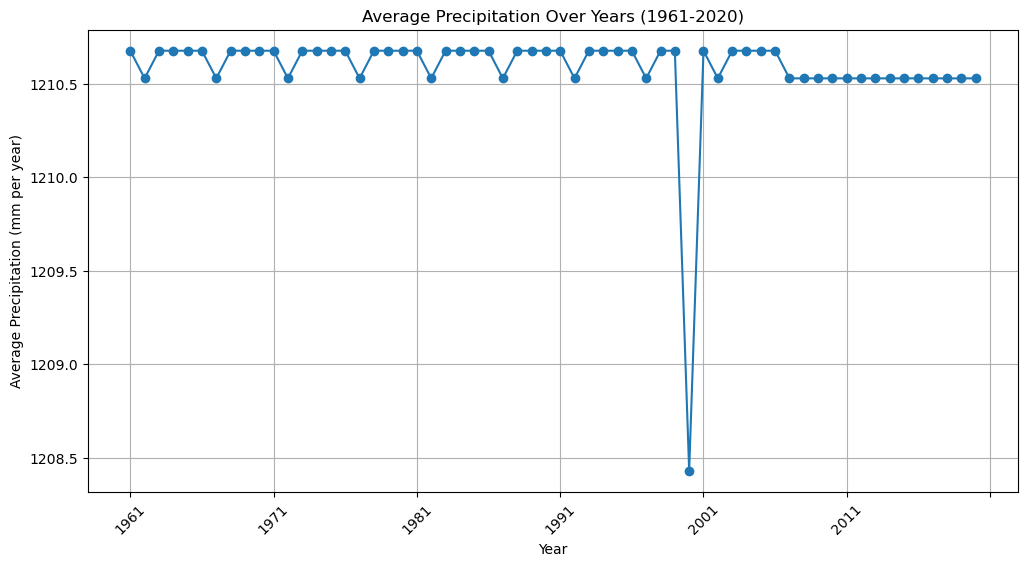

In [110]:
# Calculate average precipitation per year
average_precipitation = precipitation_data[year_columns].mean()

# Plotting average precipitation over the years
plt.figure(figsize=(12, 6))
average_precipitation.plot(kind='line', marker='o')
plt.title('Average Precipitation Over Years (1961-2020)')
plt.xlabel('Year')
plt.ylabel('Average Precipitation (mm per year)')
plt.grid()
plt.xticks(rotation=45)
plt.show()

In [ ]:
# World  Earthquakes Analysis

In [116]:
# Load the earthquake dataset
earthquake_data = pd.read_excel(
    r'C:\Users\ROSEMARY\OneDrive\Desktop\MacroEdTech Internship\Task 6_earth data analysis\earthquakes1990to2023.xlsx')

# Display the first few rows of the dataset
print(earthquake_data.head())


           time                                 place    status  tsunami  \
0  631153353990     12 km NNW of Meadow Lakes, Alaska  reviewed        0   
1  631153491210            14 km S of Volcano, Hawaii  reviewed        0   
2  631154083450            7 km W of Cobb, California  reviewed        0   
3  631155512130  11 km E of Mammoth Lakes, California  reviewed        0   
4  631155824490                16km N of Fillmore, CA  reviewed        0   

   significance   data_type  magnitudo        state   longitude   latitude  \
0            96  earthquake       2.50       Alaska -149.669200  61.730200   
1            31  earthquake       1.41       Hawaii -155.212333  19.317667   
2            19  earthquake       1.11   California -122.806167  38.821000   
3            15  earthquake       0.98   California -118.846333  37.664333   
4           134  earthquake       2.95   California -118.934000  34.546000   

    depth  year  month  
0  30.100  1990      1  
1   6.585  1990      1  

In [117]:
# Check for missing values
print(earthquake_data.isnull().sum())

# Drop rows with missing values if needed
earthquake_data.dropna(inplace=True)

# Convert relevant columns to appropriate data types if necessary
earthquake_data['year'] = earthquake_data['year'].astype(int)
earthquake_data['magnitudo'] = earthquake_data['magnitudo'].astype(float)

time            0
place           0
status          0
tsunami         0
significance    0
data_type       0
magnitudo       0
state           0
longitude       0
latitude        0
depth           0
year            0
month           0
dtype: int64


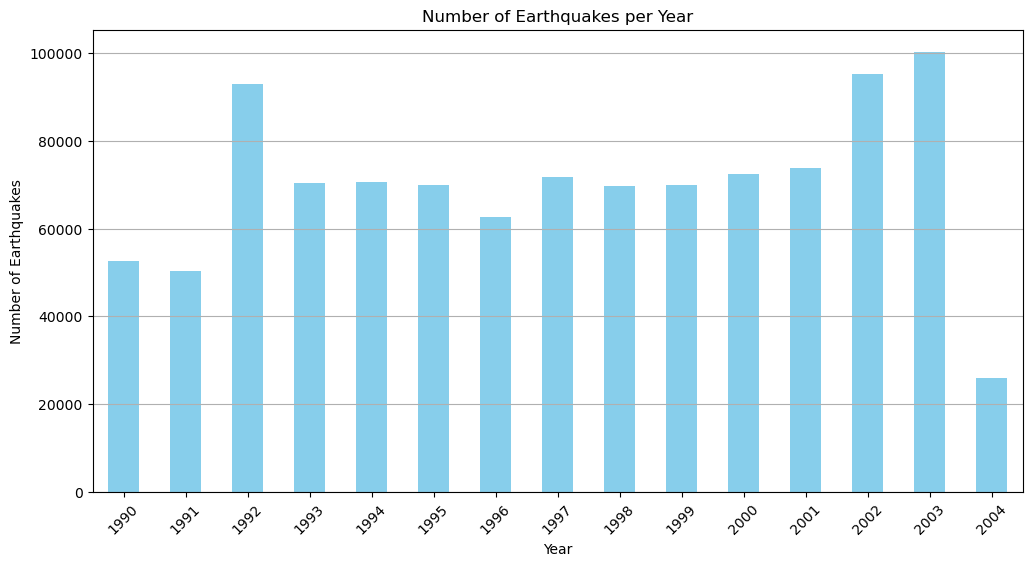

In [118]:
# Count the number of earthquakes per year
earthquakes_per_year = earthquake_data['year'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(12, 6))
earthquakes_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Earthquakes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

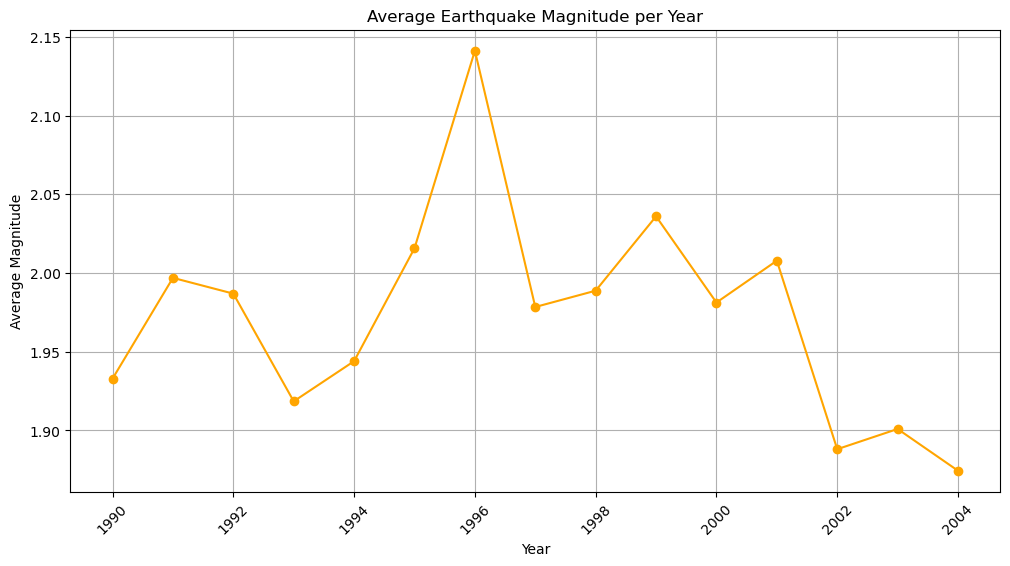

In [119]:
# Calculate the average magnitude per year
average_magnitude_per_year = earthquake_data.groupby('year')['magnitudo'].mean()

# Plotting
plt.figure(figsize=(12, 6))
average_magnitude_per_year.plot(kind='line', marker='o', color='orange')
plt.title('Average Earthquake Magnitude per Year')
plt.xlabel('Year')
plt.ylabel('Average Magnitude')
plt.grid()
plt.xticks(rotation=45)
plt.show()

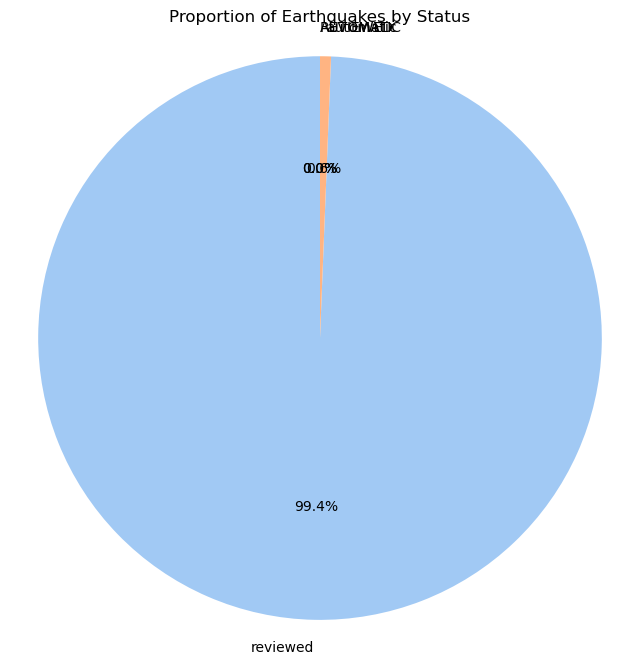

In [120]:
# Count the occurrences of each status
status_counts = earthquake_data['status'].value_counts()

# Plotting
plt.figure(figsize=(8, 8))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Proportion of Earthquakes by Status')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()

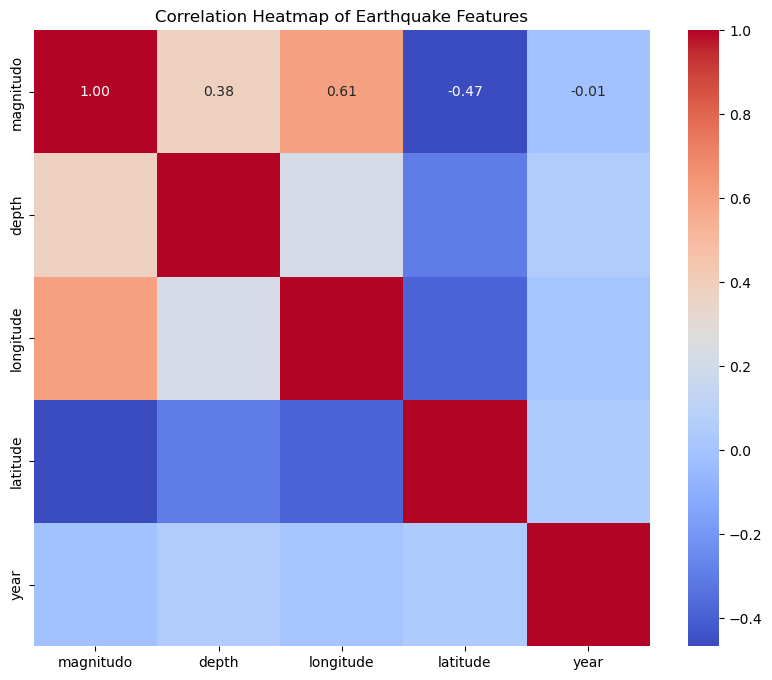

In [121]:
# Select relevant numeric columns for correlation
correlation_data = earthquake_data[['magnitudo', 'depth', 'longitude', 'latitude', 'year']]
correlation_matrix = correlation_data.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Earthquake Features')
plt.show()

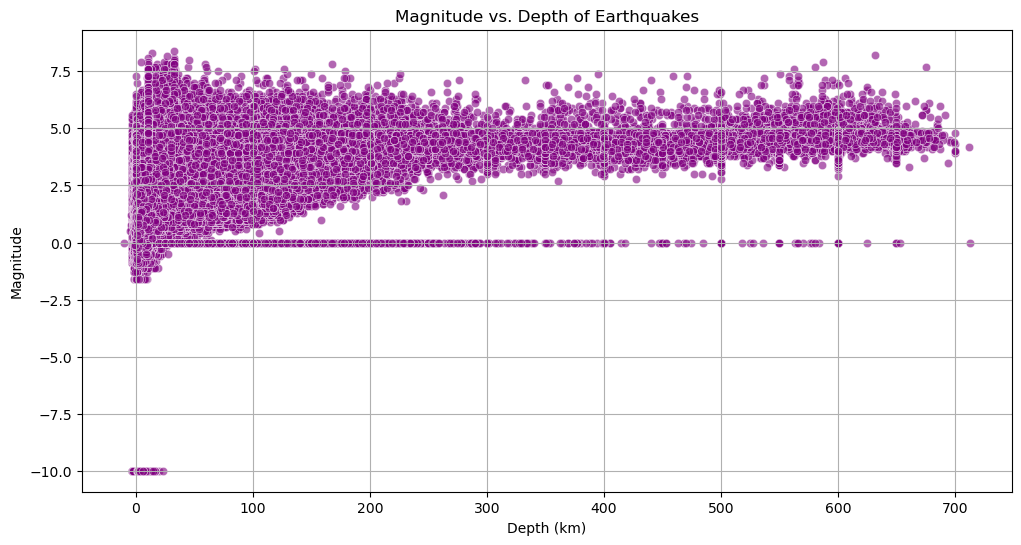

In [122]:
# Plotting
plt.figure(figsize=(12, 6))
sns.scatterplot(data=earthquake_data, x='depth', y='magnitudo', alpha=0.6, color='purple')
plt.title('Magnitude vs. Depth of Earthquakes')
plt.xlabel('Depth (km)')
plt.ylabel('Magnitude')
plt.grid()
plt.show()

# World temperatures analysis

In [2]:
temperature_data = pd.read_excel(r'C:\Users\ROSEMARY\OneDrive\Desktop\MacroEdTech Internship\Task 6_earth data analysis\city_temperature.xlsx')

In [3]:
# Check for missing values
print(temperature_data.isnull().sum())

# Drop rows with missing values if needed
temperature_data.dropna(inplace=True)

# Convert relevant columns to appropriate data types
temperature_data['Year'] = temperature_data['Year'].astype(int)
temperature_data['AvgTemperature'] = temperature_data['AvgTemperature'].astype(float)

Region            0
Country           0
City              0
Month             0
Day               0
Year              0
AvgTemperature    0
dtype: int64


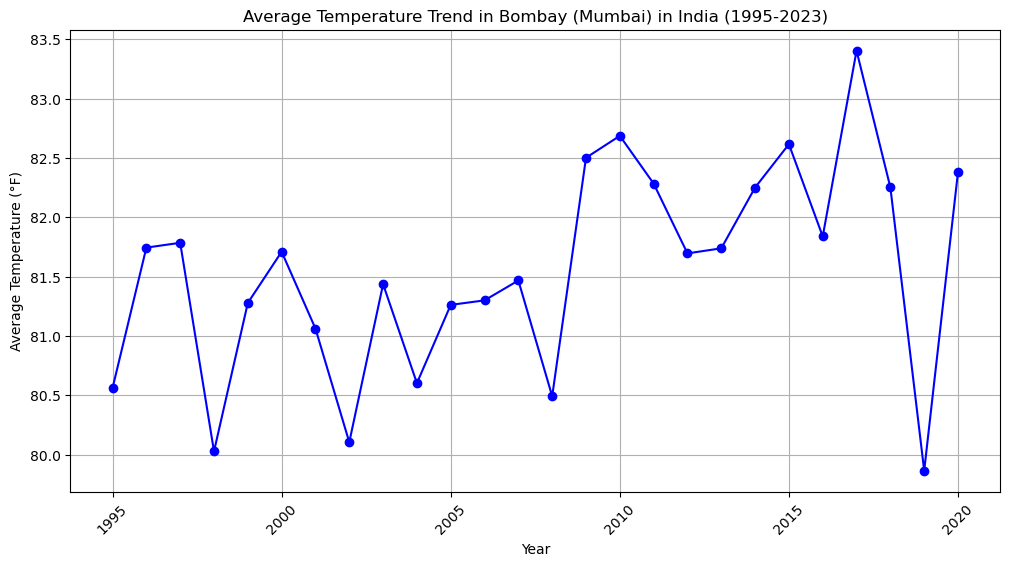

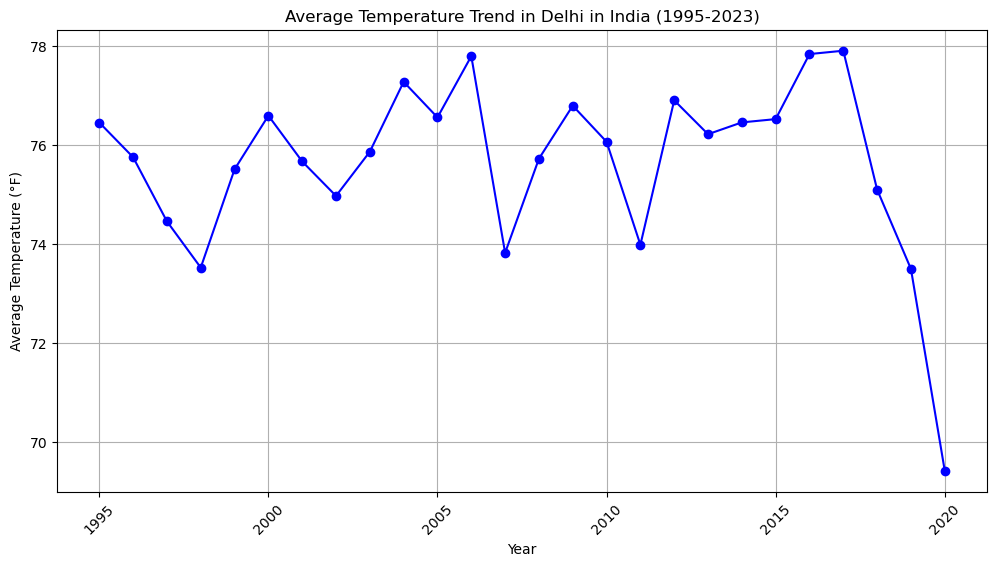

In [17]:

# Example: Average temperature trend for Algiers
city_name = 'Bombay (Mumbai)'
city_data = temperature_data[temperature_data['City'] == city_name]

# Group by year and calculate average temperature
avg_temp_per_year = city_data.groupby('Year')['AvgTemperature'].mean()

# Plotting
plt.figure(figsize=(12, 6))
avg_temp_per_year.plot(kind='line', marker='o', color='blue')
plt.title(f'Average Temperature Trend in {city_name} in India (1995-2023)')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°F)')
plt.grid()
plt.xticks(rotation=45)
plt.show()


# Example: Average temperature trend for Algiers
city_name = 'Delhi'
city_data = temperature_data[temperature_data['City'] == city_name]

# Group by year and calculate average temperature
avg_temp_per_year = city_data.groupby('Year')['AvgTemperature'].mean()

# Plotting
plt.figure(figsize=(12, 6))
avg_temp_per_year.plot(kind='line', marker='o', color='blue')
plt.title(f'Average Temperature Trend in {city_name} in India (1995-2023)')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°F)')
plt.grid()
plt.xticks(rotation=45)
plt.show()

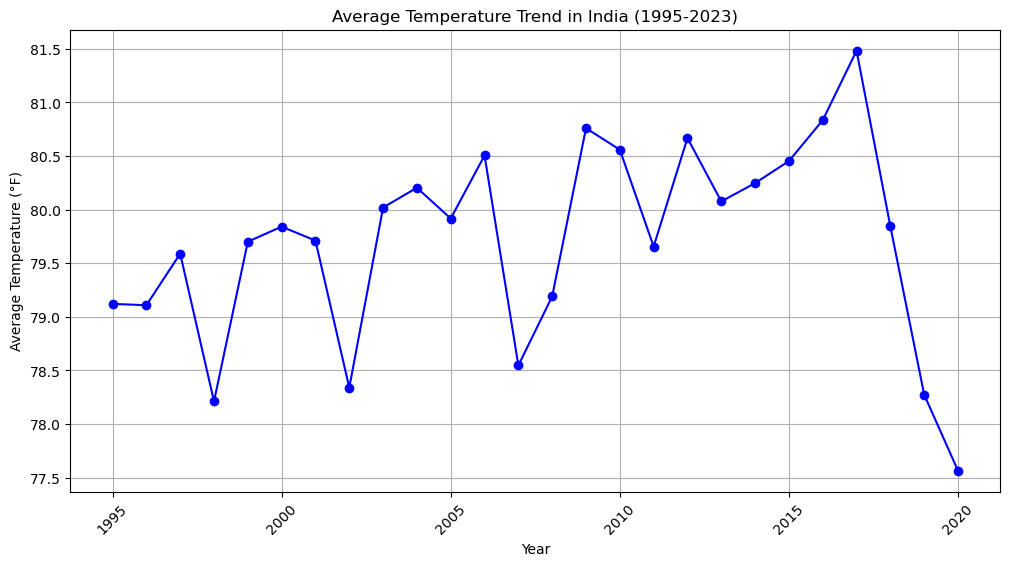

In [12]:
# Example: Average temperature trend for Algiers
country_name = 'India'
country_data = temperature_data[temperature_data['Country'] == country_name]

# Group by year and calculate average temperature
avg_temp_per_year = country_data.groupby('Year')['AvgTemperature'].mean()

# Plotting
plt.figure(figsize=(12, 6))
avg_temp_per_year.plot(kind='line', marker='o', color='blue')
plt.title(f'Average Temperature Trend in {country_name} (1995-2023)')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°F)')
plt.grid()
plt.xticks(rotation=45)
plt.show()

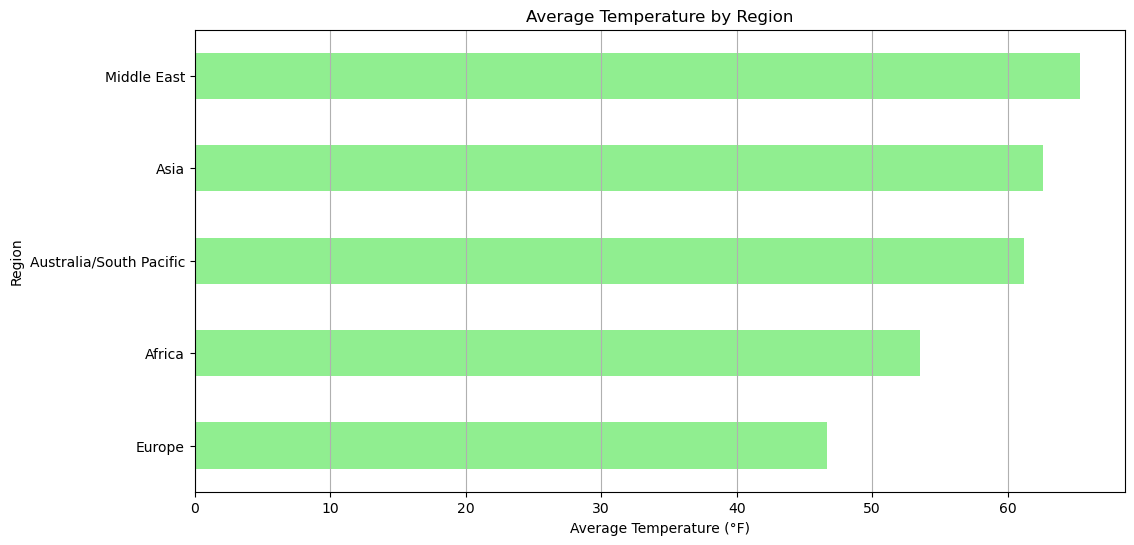

In [5]:
# Calculate average temperature by region
avg_temp_by_region = temperature_data.groupby('Region')['AvgTemperature'].mean().sort_values()

# Plotting
plt.figure(figsize=(12, 6))
avg_temp_by_region.plot(kind='barh', color='lightgreen')
plt.title('Average Temperature by Region')
plt.xlabel('Average Temperature (°F)')
plt.ylabel('Region')
plt.grid(axis='x')
plt.show()

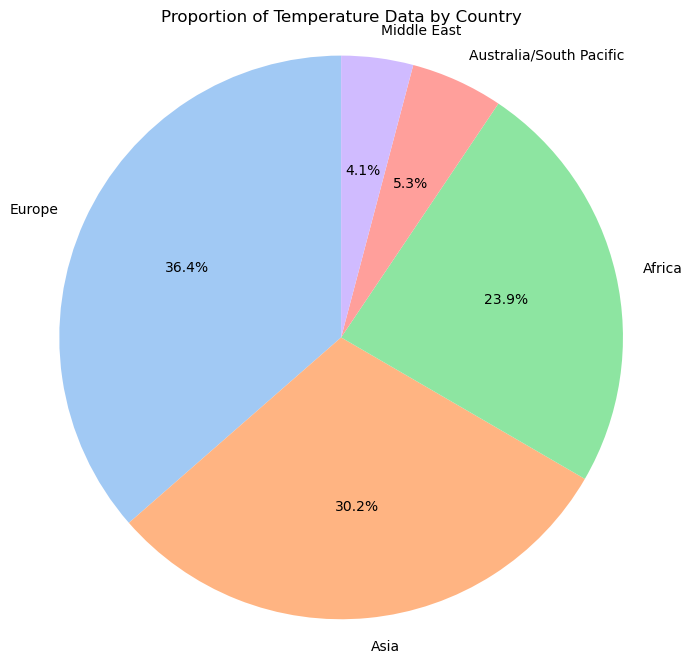

In [7]:
# Count occurrences of each country
country_counts = temperature_data['Region'].value_counts()

# Plotting
plt.figure(figsize=(8, 8))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Proportion of Temperature Data by Country')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()

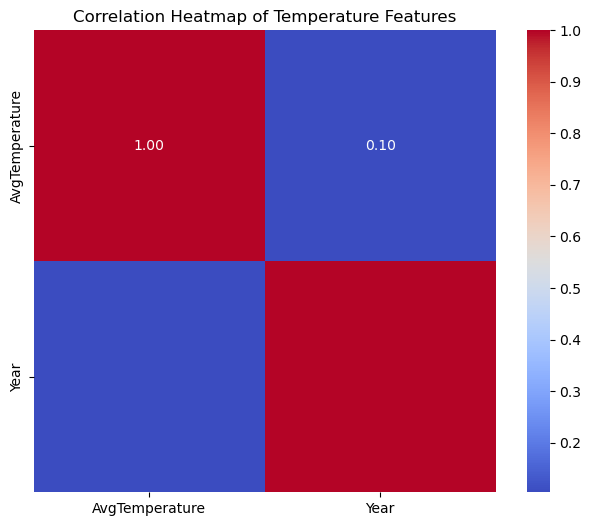

In [8]:
# Select relevant numeric columns for correlation
correlation_data = temperature_data[['AvgTemperature', 'Year']]
correlation_matrix = correlation_data.corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Temperature Features')
plt.show()

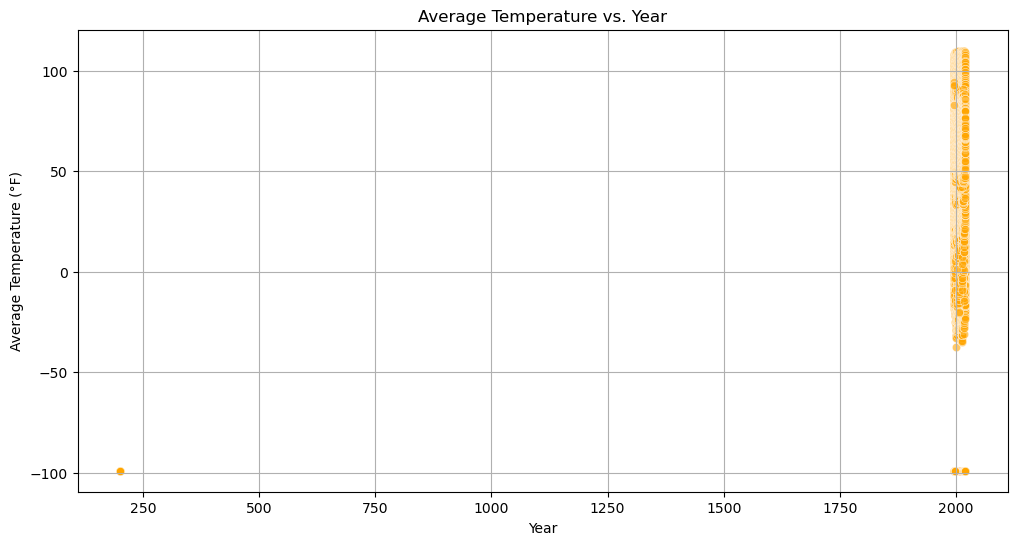

In [9]:
# Plotting
plt.figure(figsize=(12, 6))
sns.scatterplot(data=temperature_data, x='Year', y='AvgTemperature', alpha=0.6, color='orange')
plt.title('Average Temperature vs. Year')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°F)')
plt.grid()
plt.show()